In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import One-hot-encoder
from sklearn.preprocessing import OneHotEncoder
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

    Load the Dataset: Load your dataset into your programming environment (e.g., Python with libraries like Pandas for tabular data or NumPy for numerical data).

    Inspect the Data: Take a quick look at the first few rows of your dataset using functions like head() in Pandas to understand what your data looks like.

    Understand the Dataset Structure:
        Check the dimensions of the dataset (number of rows and columns).
        Identify the types of variables (numeric, categorical, etc.).
        Check for missing values.

    Summary Statistics:
        Compute summary statistics such as mean, median, mode, standard deviation, minimum, and maximum for numerical features.
        For categorical features, you can compute frequency counts.

    Visualize Univariate Distributions:
        Plot histograms for numerical variables to understand their distributions.
        For categorical variables, plot bar charts to visualize their frequencies.

    Explore Relationships Between Variables:
        Use scatter plots to visualize relationships between pairs of numerical variables.
        Use box plots or violin plots to visualize the distribution of numerical variables across different categories of categorical variables.
        Use crosstabs or pivot tables to examine relationships between pairs of categorical variables.

    Handle Outliers and Missing Values:
        Identify outliers and decide how to handle them (e.g., removing, transforming, or imputing).
        Decide on a strategy for handling missing values (e.g., imputation, deletion, or treating them as a separate category).

    Feature Engineering:
        Explore potential new features that could be derived from existing features.
        Transform variables if necessary (e.g., scaling or encoding categorical variables).

    Correlation Analysis:
        Compute correlation coefficients between pairs of numerical variables.
        Visualize correlations using heatmaps.

    Understand Target Variable Distribution:

    If you have a target variable (e.g., for supervised learning), examine its distribution and understand its properties.

    Iterate and Document:

    Iterate on the above steps as needed based on your findings.
    Document your observations, insights, and decisions made during the EDA process.

    Finalize the Dataset:

    Once you have completed the EDA and made necessary preprocessing decisions, finalize your dataset for modeling.

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BankChurners1.csv')

Data Preprocessing

In [4]:
# How many Columns do we have and how many of them are Categorical or Numerical
dataset.info()
# types of the columns
print('--------------')
print(dataset.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
# remove the last two columns
# dataset = dataset.iloc[:, :-2]
# save the dataset as csv file
# dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/BankChurners1.csv', index=False)

    Dataset columns representations

    CLIENTNUM: represents a unique identifier for each customer in your dataset. It's of integer data type (int64)

    Attrition_Flag: indicates whether a customer has experienced attrition or not. It's of object data type

    Customer_Age: represents the age of each customer. It's of integer data type (int64)

    Gender: This column indicates the gender of each customer. It's of object data type

    Dependent_count: represents the number of dependents (e.g., children, elderly relatives) that each customer has. It's of integer data type (int64).

    Education_Level: indicates the education level of each customer. It's of object data typ.

    Marital_Status: indicates the marital status of each customer. It's of object data type

    Income_Category: represents the income category of each customer. It's of object data typ.

    Card_Category: indicates the type of credit card held by each customer. It's of object data type, containing categorical values such as "Blue", "Silver", "Gold", "Platinum".

    Months_on_book: represents the number of months that each customer has been a customer of the bank . It's of integer data type (int64).

    Total_Relationship_Count: represents the total number of products or services held by each customer with the bank . It's of integer data type (int64).

    Months_Inactive_12_mon: represents the number of months in the last twelve months during which each customer has been inactive (i.e., not engaged with the bank's services). It's of integer data type (int64).

    Contacts_Count_12_mon: represents the number of times each customer has been contacted by the bank within the last twelve months. It's of integer data type (int64).

    Credit_Limit: represents the credit limit assigned to each customer. It's of float data type (float64), indicating it contains numerical values.

    Total_Revolving_Bal: represents the total revolving balance (i.e., the outstanding balance on a credit card account) for each customer. It's of integer data type (int64).

    Avg_Open_To_Buy: represents the average amount of credit available for each customer to use. It's of float data type (float64), indicating it contains numerical values.

    Total_Amt_Chng_Q4_Q1: represents the percentage change in the total transaction amount from the fourth quarter to the first quarter. It's of float data type (float64), indicating it contains numerical values.

    Total_Trans_Amt: represents the total transaction amount for each customer. It's of integer data type (int64).

    Total_Trans_Ct: represents the total number of transactions for each customer. It's of integer data type (int64).

    Total_Ct_Chng_Q4_Q1: represents the percentage change in the total number of transactions from the fourth quarter to the first quarter. It's of float data type (float64), indicating it contains numerical values.

    Avg_Utilization_Ratio: represents the average utilization ratio of each customer's credit card. It's of float data type (float64), indicating it contains numerical values representing percentages.


In [6]:
# data distribution in each column
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
# check any missing values in all columns
dataset.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
# check any Na or NAN in any of the columns
dataset.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
# check for unknowns
dataset.isin(['Unknown']).sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [43]:
# check for ? or any character values
dataset.isin(['?']).sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
# Drop the first column as it is just the Customer ID-Number
dataset = dataset.iloc[:, 1:]

<Axes: xlabel='Education_Level'>

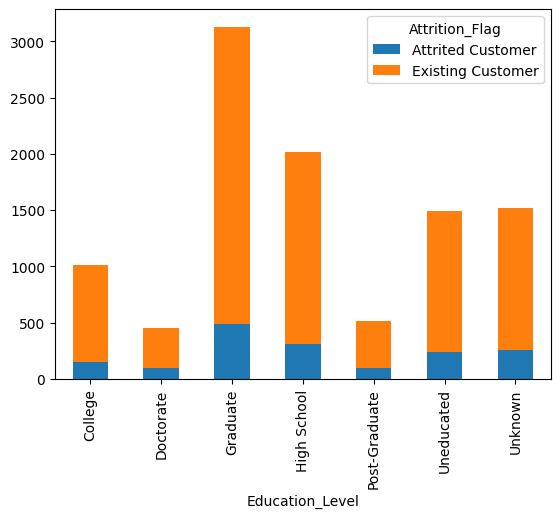

In [11]:
# we need to handle the unknown values
# graphical distribution of Education_Level relative to the Attrition_Flag
dataset.groupby(['Education_Level', 'Attrition_Flag']).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Marital_Status'>

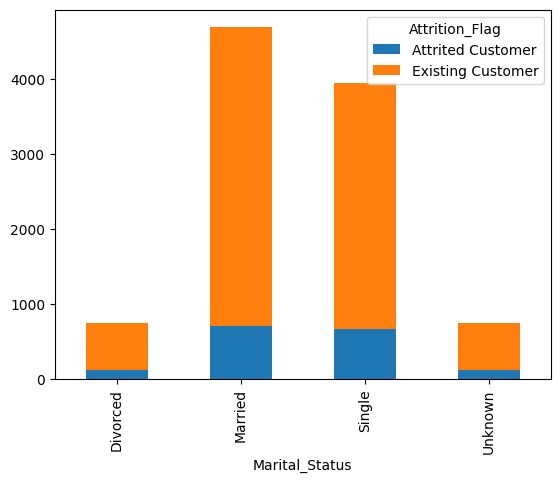

In [12]:
# graphical distribution of Marital_Status relative to the Attrition_Flag
dataset.groupby(['Marital_Status', 'Attrition_Flag']).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Income_Category'>

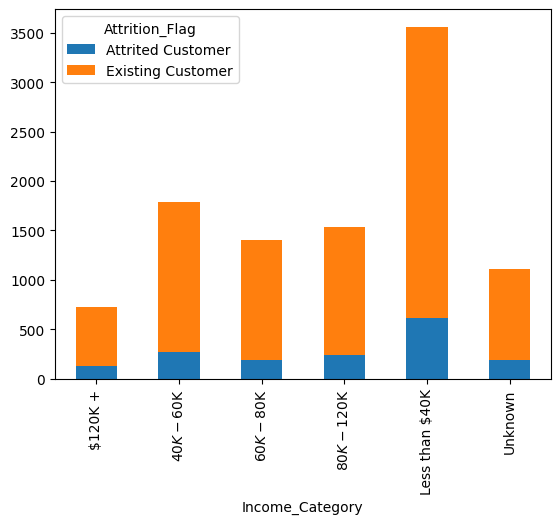

In [13]:
# graphical distribution of Income_Category relative to the Attrition_Flag
dataset.groupby(['Income_Category', 'Attrition_Flag']).size().unstack().plot(kind='bar', stacked=True)

    Education_Level (1519 Unknowns):
        We will treat 'Unknown' as a separate category due to the relatively balanced distribution of known education levels.

    Marital_Status (749 Unknowns):
        We will treat 'Unknown' as a separate category given the relatively balanced distribution of known marital statuses.

    Income_Category (1112 Unknowns):
        We will treat 'Unknown' as a separate category considering the balanced distribution of income categories.

array([[<Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Months_on_book'}>,
        <Axes: title={'center': 'Total_Relationship_Count'}>],
       [<Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>,
        <Axes: title={'center': 'Credit_Limit'}>,
        <Axes: title={'center': 'Total_Revolving_Bal'}>],
       [<Axes: title={'center': 'Avg_Open_To_Buy'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Total_Trans_Amt'}>,
        <Axes: title={'center': 'Total_Trans_Ct'}>],
       [<Axes: title={'center': 'Total_Ct_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>, <Axes: >,
        <Axes: >]], dtype=object)

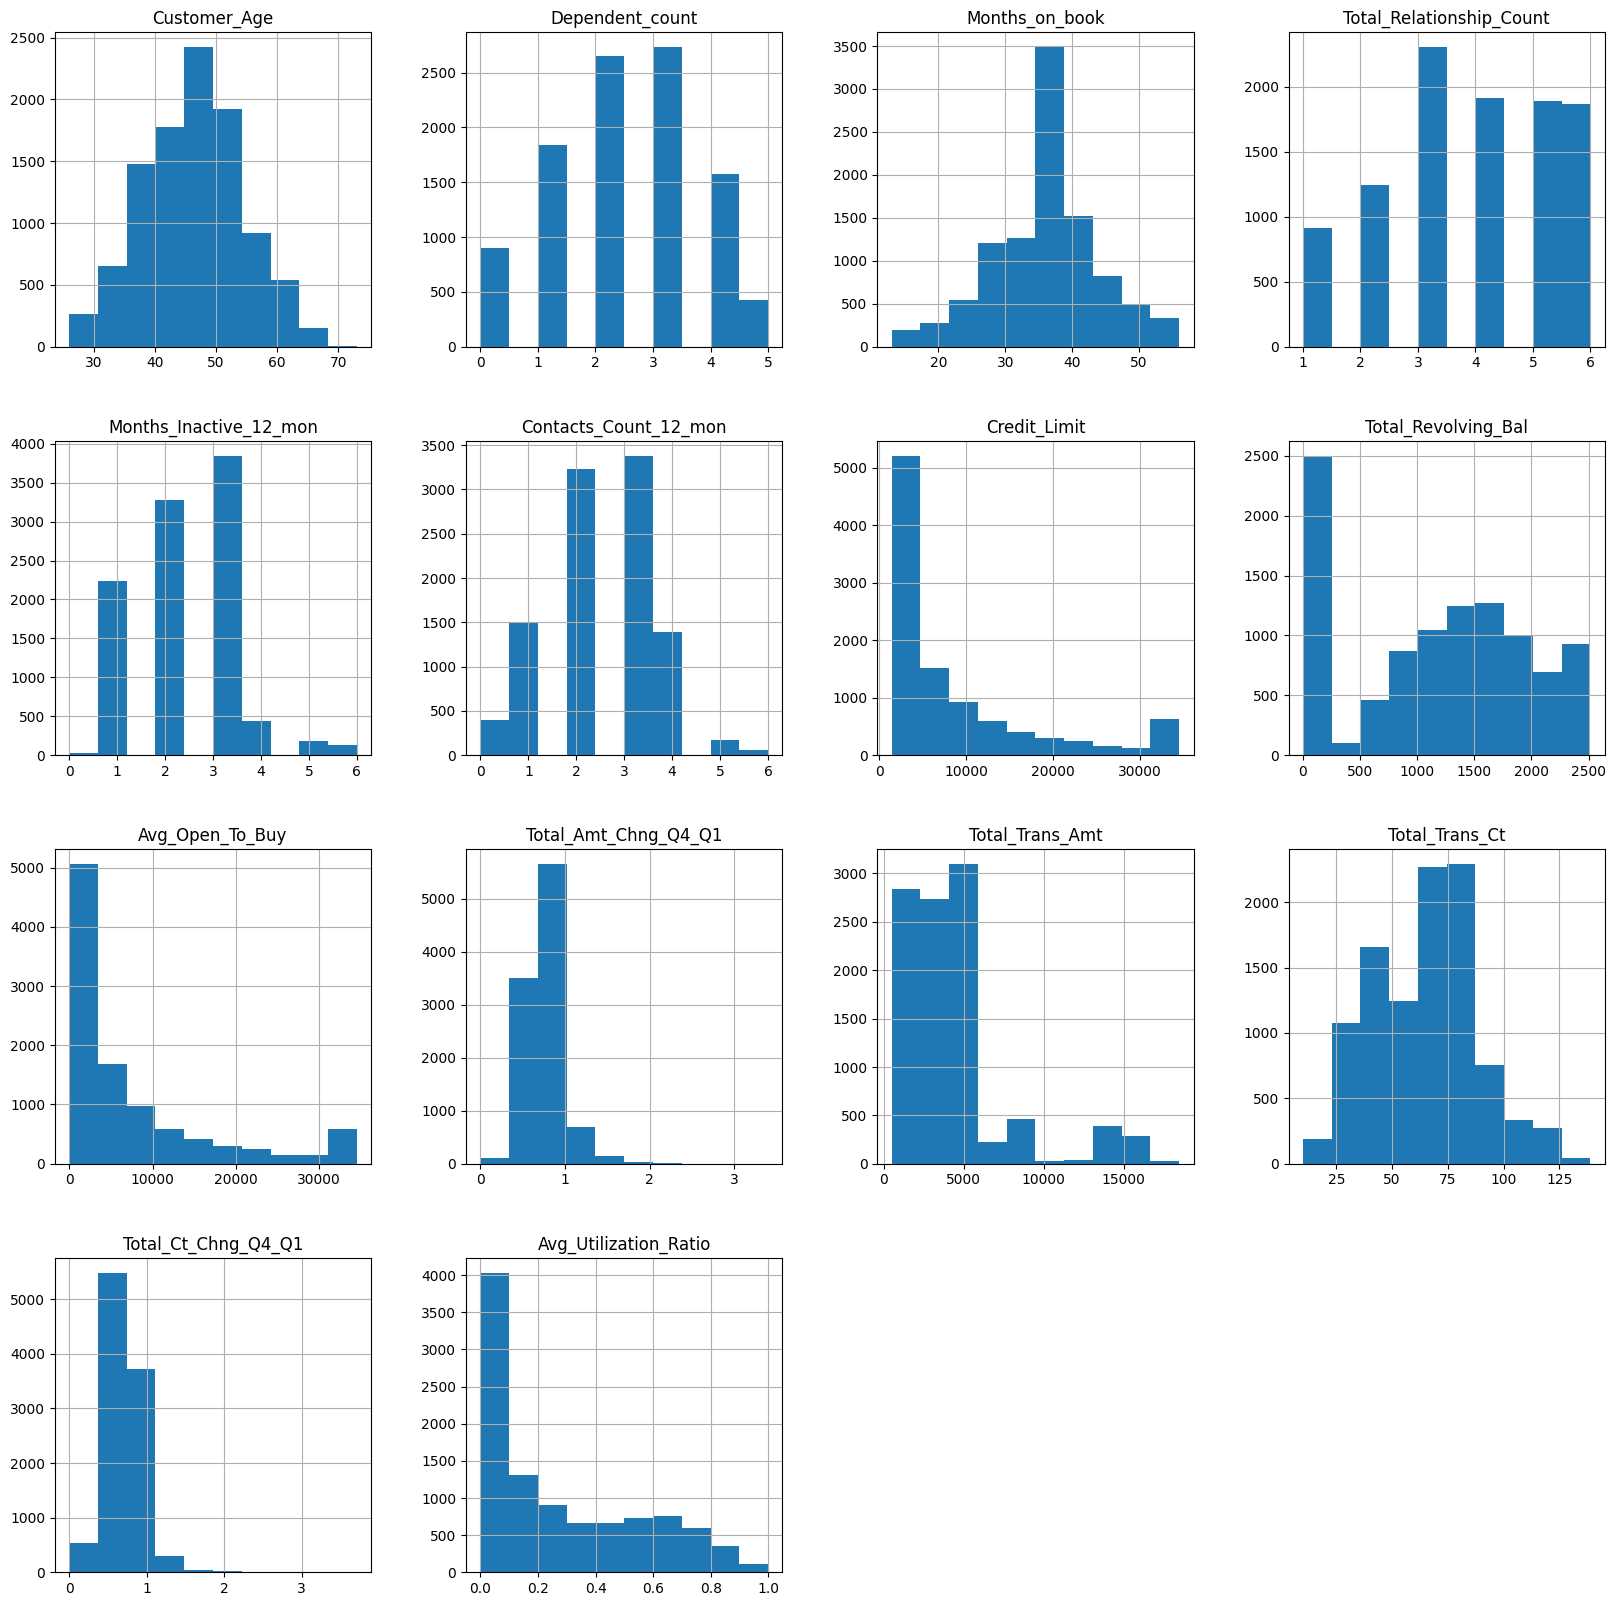

In [14]:
# Data distribution in all columns
dataset.hist(figsize=(20,20))

In [15]:
# Categorical columns analysis
categorical_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
# how many distinct values in each categorical columns
for col in categorical_columns:
  print(col, ':', dataset[col].nunique())
  print(dataset[col].value_counts())


Attrition_Flag : 2
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Gender : 2
Gender
F    5358
M    4769
Name: count, dtype: int64
Education_Level : 7
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Marital_Status : 4
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Income_Category : 6
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Card_Category : 4
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [16]:
# Encoding: One-hot-encoding and Ranking (cardinal and nominal)
# use OneHotEncoder to encoding for Gender and Marital_Status
# Select categorical columns
categorical_cols = ['Gender', 'Marital_Status']

# Initialize OneHotEncoder
onehotencoder = OneHotEncoder(sparse=False)

# Fit and transform the selected columns
encoded_cols = onehotencoder.fit_transform(dataset[categorical_cols])

# Create new column names for the encoded features
encoded_col_names = onehotencoder.get_feature_names_out(categorical_cols)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names)

# Drop the original categorical columns from the dataset
dataset.drop(columns=categorical_cols, inplace=True)

# Concatenate the original dataset with the encoded features
dataset = pd.concat([dataset, encoded_df], axis=1)

# use lablel encoding for Education_Level
dataset['Education_Level'] = dataset['Education_Level'].map({'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6, 'Unknown': 7})
# use cardinal encoding for Income_Category
dataset['Income_Category'] = dataset['Income_Category'].map({'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K':4, '$120K +': 5, 'Unknown': 6})
# use cardinal encoding for Card_Category
dataset['Card_Category'] = dataset['Card_Category'].map({'Blue': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4})

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[<Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Education_Level'}>,
        <Axes: title={'center': 'Income_Category'}>,
        <Axes: title={'center': 'Card_Category'}>],
       [<Axes: title={'center': 'Months_on_book'}>,
        <Axes: title={'center': 'Total_Relationship_Count'}>,
        <Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>,
        <Axes: title={'center': 'Credit_Limit'}>],
       [<Axes: title={'center': 'Total_Revolving_Bal'}>,
        <Axes: title={'center': 'Avg_Open_To_Buy'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Total_Trans_Amt'}>,
        <Axes: title={'center': 'Total_Trans_Ct'}>],
       [<Axes: title={'center': 'Total_Ct_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>,
        <Axes: title={'center': 'Gender_F'}>,
        <Axes: titl

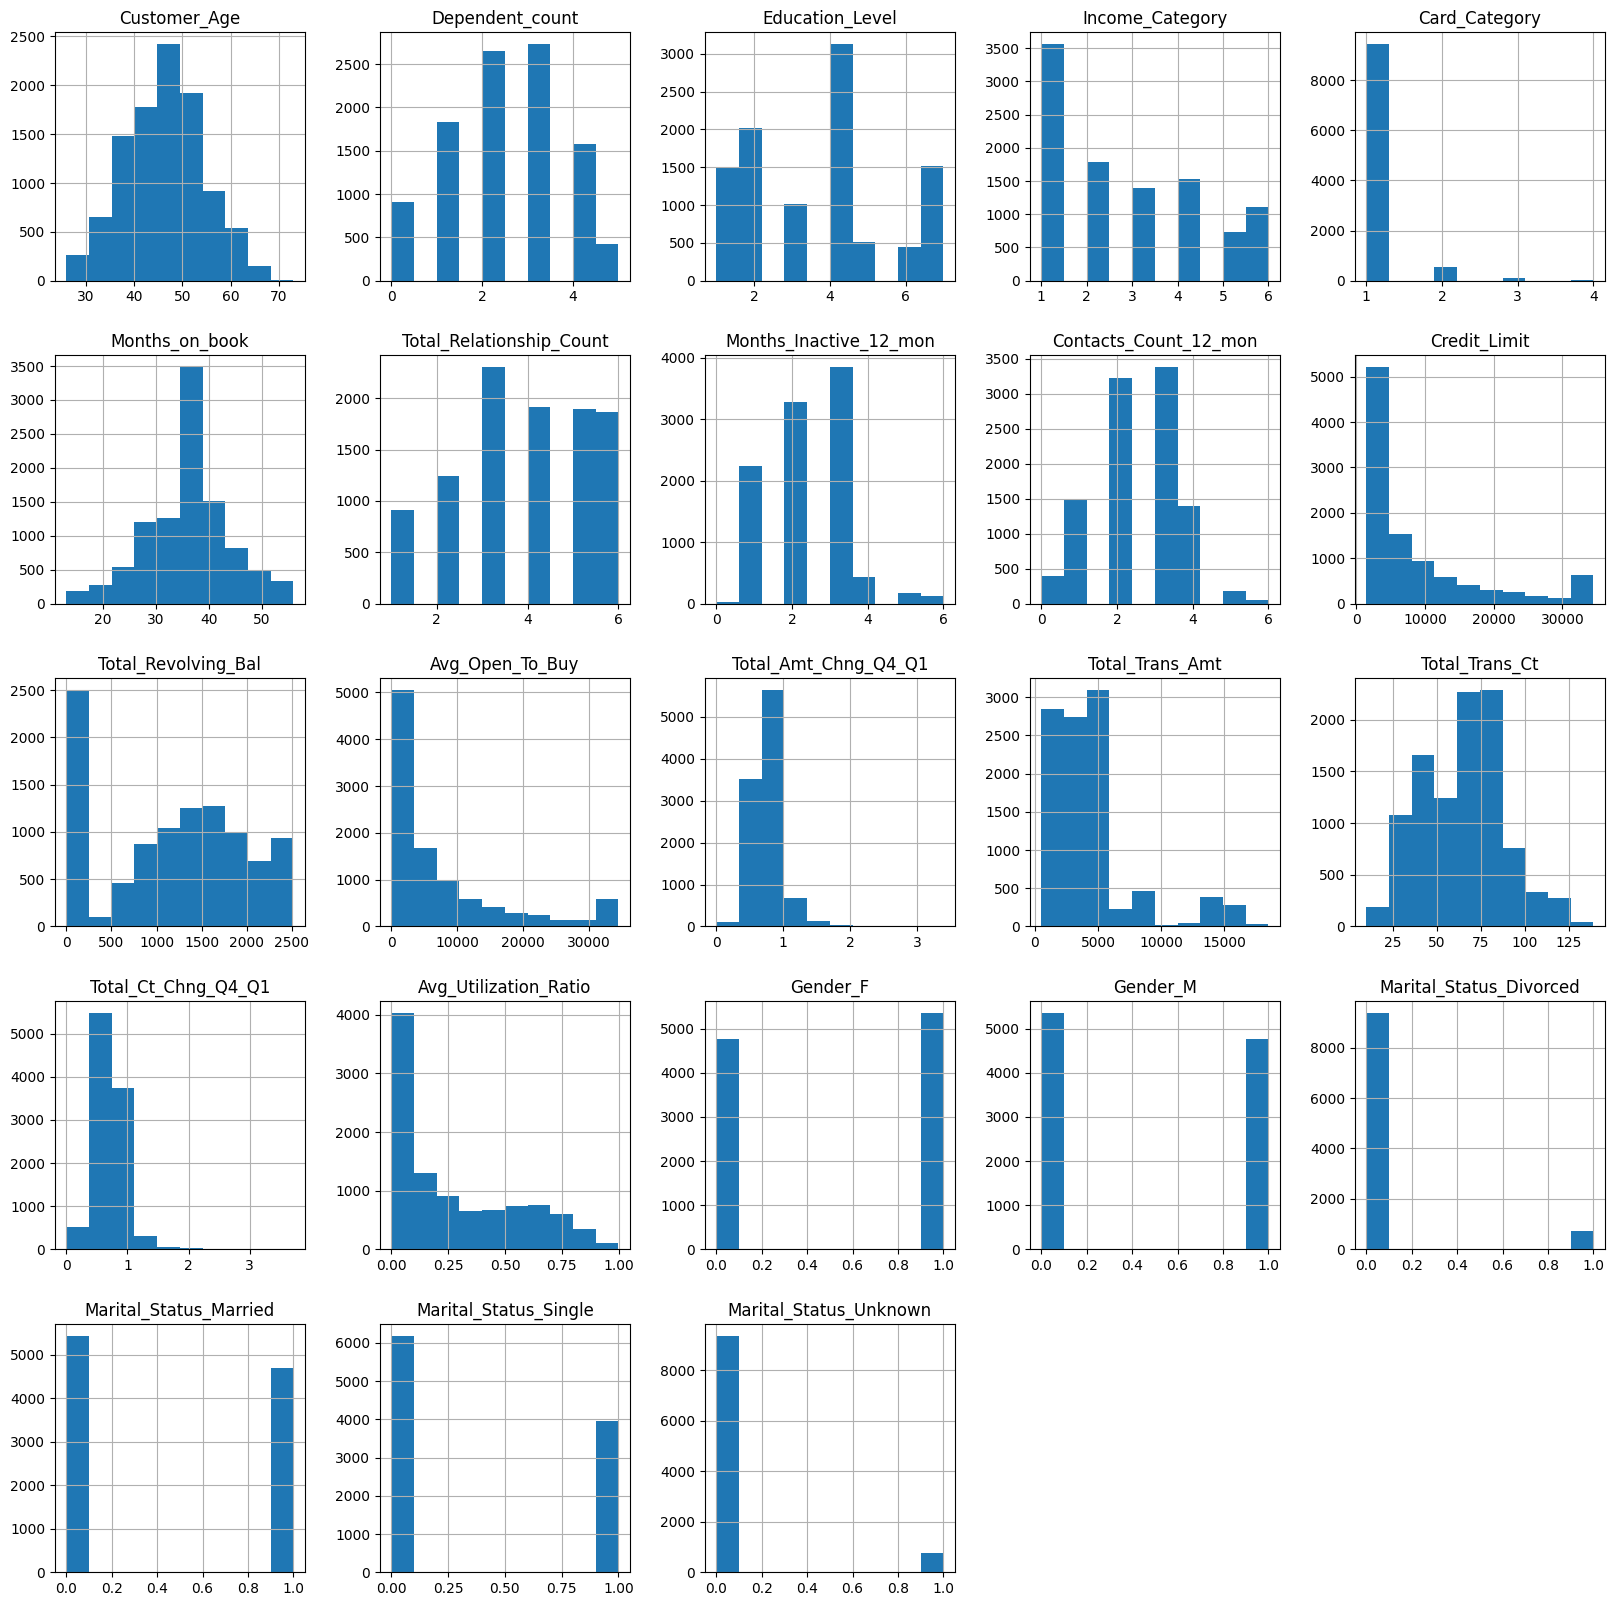

In [17]:
# Data distribution in all columns: After data preprocessing
dataset.hist(figsize=(20,20))

In [18]:
# data distribution in each column after preprocessing
dataset.describe()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,3.651921,2.744544,1.083638,35.928409,3.812580,2.341167,2.455317,8631.953698,...,4404.086304,64.858695,0.712222,0.274894,0.529081,0.470919,0.073862,0.462822,0.389355,0.073961
std,8.016814,1.298908,1.917002,1.716188,0.333784,7.986416,1.554408,1.010622,1.106225,9088.776650,...,3397.129254,23.472570,0.238086,0.275691,0.499178,0.499178,0.261559,0.498641,0.487628,0.261720
min,26.000000,0.000000,1.000000,1.000000,1.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,...,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,2.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,...,2155.500000,45.000000,0.582000,0.023000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,4.000000,2.000000,1.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,...,3899.000000,67.000000,0.702000,0.176000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,3.000000,4.000000,4.000000,1.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,...,4741.000000,81.000000,0.818000,0.503000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,73.000000,5.000000,7.000000,6.000000,4.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,...,18484.000000,139.000000,3.714000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# observe the data in the Categrical columns
dataset.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,Existing Customer,45,3,2,3,1,39,5,1,3,...,1144,42,1.625,0.061,0.0,1.0,0.0,1.0,0.0,0.0
1,Existing Customer,49,5,4,1,1,44,6,1,2,...,1291,33,3.714,0.105,1.0,0.0,0.0,0.0,1.0,0.0
2,Existing Customer,51,3,4,4,1,36,4,1,0,...,1887,20,2.333,0.000,0.0,1.0,0.0,1.0,0.0,0.0
3,Existing Customer,40,4,2,1,1,34,3,4,1,...,1171,20,2.333,0.760,1.0,0.0,0.0,0.0,0.0,1.0
4,Existing Customer,40,3,1,3,1,21,5,1,0,...,816,28,2.500,0.000,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
#